# Trabalho Aula 02

Integrantes:

    1) RM357067 - Edinaldo Rodrigues de Oliveira Junior
    2) RM358158 - Henrique Cardoso
    3) RM358067 - Jefferson de Souza Santos
    4) RM357344 - Walace Vinicius Silva dos Santos

Base de dados : https://www.kaggle.com/datasets/willianoliveiragibinpixar-films "Pixar Films"

Realizaremos a previsão da bilheteria mundial "box_office_worldwide", considerando a duração do filme "run_time".

In [1]:
import pandas as pd
import sklearn as skl
import seaborn as sns
from sklearn import metrics
pixar = pd.read_csv('pixar_films new.csv')
pixar.head(3)

,ID,film,film_rating,cinema_score,release_date,run_time,budget,box_office_us_canada,box_office_other,box_office_worldwide,rotten_tomatoes_score,rotten_tomatoes_counts,metacritic_score,metacritic_counts,imdb_score,imdb_counts
0,1,Toy Story,G,A,1995-11-22,81,30000000,223225679,171210907,394436586,100,96,95,26,8.3,1089101
1,2,A Bug's Life,G,A,1998-11-25,95,120000000,162798565,200460294,363258859,92,91,78,23,7.2,319596
2,3,Toy Story 2,G,A+,1999-11-24,92,90000000,245852179,265506097,511358276,100,172,88,34,7.9,630573


In [2]:
pixar_filtrada = pixar[['run_time','box_office_worldwide']]
pixar_filtrada.head(3)

,run_time,box_office_worldwide
0,81,394436586
1,95,363258859
2,92,511358276


In [3]:
pixar_filtrada.corr()

,run_time,box_office_worldwide
run_time,1.000000,0.163002
box_office_worldwide,0.163002,1.000000


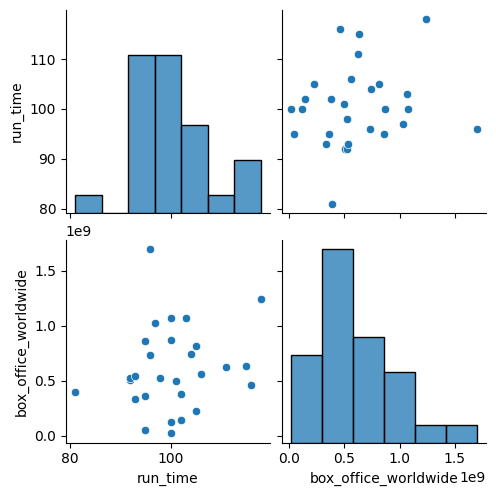

In [4]:
sns.pairplot(pixar_filtrada)

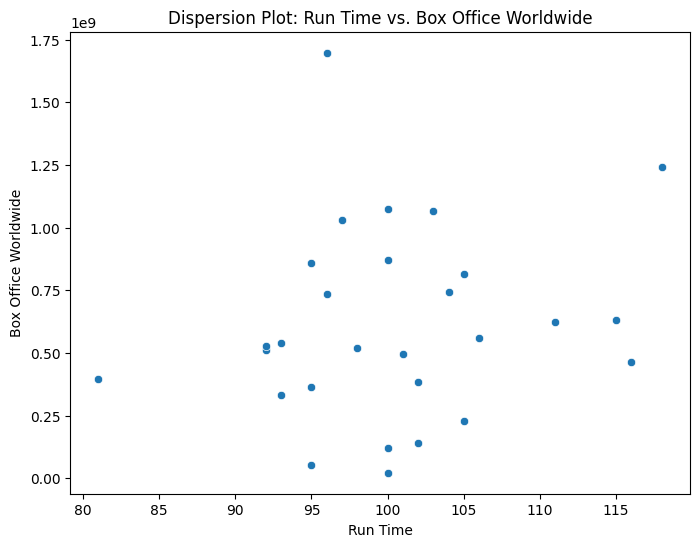

In [5]:
# prompt: plot a dispesion between "box_office_worldwide", considering "run_time" or "budget".

import matplotlib.pyplot as plt

# Create the dispersion plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pixar_filtrada, x='run_time', y='box_office_worldwide')
plt.title('Dispersion Plot: Run Time vs. Box Office Worldwide')
plt.xlabel('Run Time')
plt.ylabel('Box Office Worldwide')
plt.show()

In [6]:
# prompt: predict the "box_office_worldwide", considering "run_time" or "budget".

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data
X = pixar_filtrada[['run_time']]
y = pixar_filtrada['box_office_worldwide']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = round(metrics.mean_absolute_error(y_test, y_pred),2)
print('Mean Absolute Error: R$',mse)
msr = round(metrics.mean_squared_error(y_test, y_pred),2)
print('Mean Squared Error: R$', msr)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)
print('Root Mean Squared Error: R$', rmse)

# Example prediction (replace with your desired input)
new_data = pd.DataFrame({'run_time': [120]})
predicted_box_office = model.predict(new_data)
previsao = round(predicted_box_office[0],2)
print(f"Predicted Box Office for new movie: R$ {previsao}")


Mean Absolute Error: R$ 224606134.53
Mean Squared Error: R$ 8.646857628024626e+16
Root Mean Squared Error: R$ 294055396.62
Predicted Box Office for new movie: R$ 812723521.73


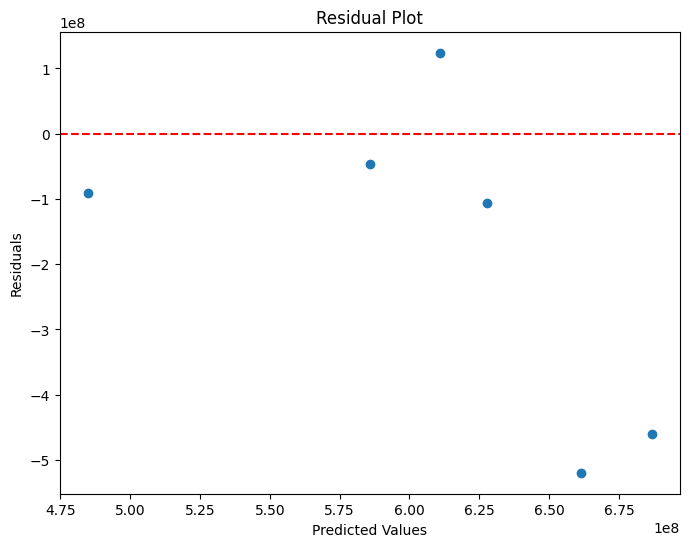

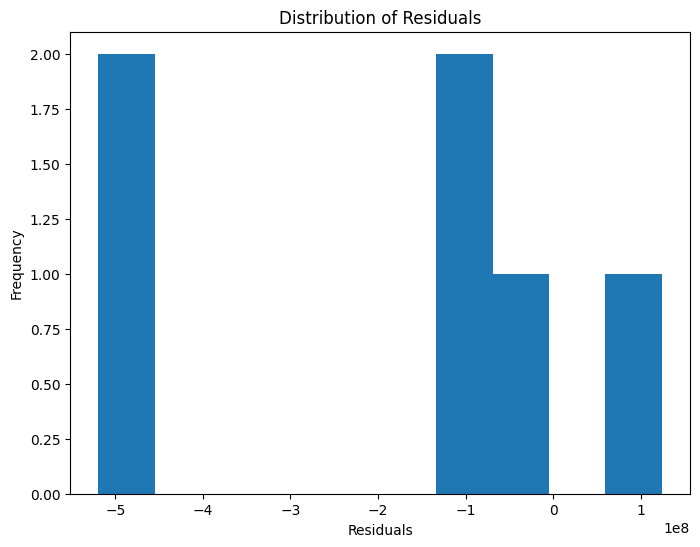

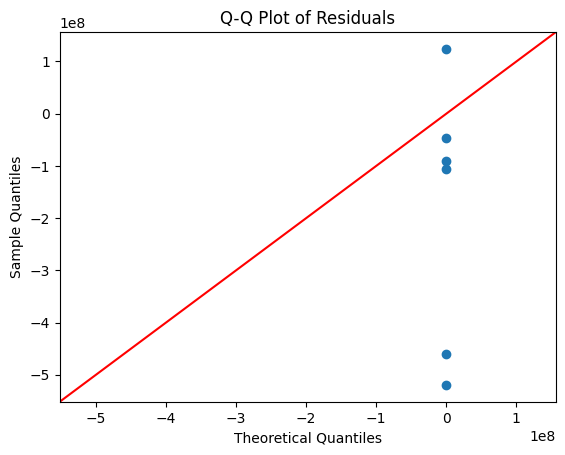

Mean of Residuals: -183243071.75
Standard Deviation of Residuals: 251929878.19


In [7]:
# prompt: generate a residual analisys

# Calculate residuals
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=10)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

# Check for normality of residuals (using Q-Q plot)
import statsmodels.api as sm
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

# Calculate and print some residual statistics
print(f"Mean of Residuals: {round(residuals.mean(),2)}")
print(f"Standard Deviation of Residuals: {round(residuals.std(),2)}")
